<a href="https://colab.research.google.com/github/sam-thurman/asl_alphabet_image_classification/blob/master/notebooks/model_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

import lime
import lime.lime_image

print('Notebook running: keras ', keras.__version__)
import pandas as pd
import numpy as np
import scipy as math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# from PIL import Image

from sklearn.model_selection import train_test_split
from skimage.transform import resize
import keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Model, Sequential
from keras import layers
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras import optimizers
from keras.optimizers import Adam
from keras.models import load_model

import detect_edges
import tensorflow as tf

import sys
import os

from imageio import imread, imsave

Notebook running: keras  2.3.1


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/My\ Drive/

In [60]:
warnings.filterwarnings('ignore')

model = load_model('../models/unet_inception.keras')
unet = load_model('../models/edge_detect/unet2.keras')

In [3]:
train_path = '../data/asl_alphabet_train'
validation_path = '../data/asl_alphabet_validation'
sam_path = '../data/asl_extra_val'
image_size = 200
batch_size = 32
valgen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=detect_edges.predict_custom_image,
                                                      rescale=1./255) 
val_generator = valgen.flow_from_directory(
                validation_path,  # directory for validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical',
                color_mode='rgb',
                shuffle=False)

# samgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=(lambda x: tf.image.central_crop(x, central_fraction=1)))
# sam_generator = samgen.flow_from_directory(
#                 sam_path,  # directory for me-made validation images
#                 target_size=(image_size, image_size),
#                 batch_size=batch_size,
#                 class_mode='categorical',
#                 color_mode='rgb',
#                 shuffle=False)

Found 30 images belonging to 29 classes.


In [65]:
data_path = '../data/asl_alphabet_validation/'
Xi = skimage.io.imread(os.path.join(data_path, 'F/F_test.jpg'))
from skimage.color import rgb2gray
Xi = detect_edges.predict_custom_image(Xi)
Xi = detect_edges.to_rgb1(Xi)
Xi = resize(Xi,(1,200,200,3))
Xi.shape

# '''FOR GRAY'''
# data_path = '../data/asl_alphabet_validation/'
# Xi = skimage.io.imread(os.path.join(data_path, 'D/D_test.jpg'))
# from skimage.color import rgb2gray
# Xi = detect_edges.predict_custom_image(Xi)
# # Xi = detect_edges.to_rgb1(Xi)
# Xi = resize(Xi,(1,128,128,1))
# Xi.shape

(256, 256)


(1, 200, 200, 3)

In [66]:
np.argmax(model.predict(Xi))

11

In [67]:
explainer = lime.lime_image.LimeImageExplainer()

(256, 256)


array([0.14847514, 0.12329506, 0.25937355, 0.12181437, 0.08140004,
       0.08335752, 0.0948503 , 0.10445231, 0.10922245, 0.11203209,
       0.12417781, 0.15367039, 0.17079793, 0.17767128, 0.1878564 ,
       0.16690311, 0.1469742 , 0.12781681, 0.11688189, 0.09432915,
       0.08988279, 0.10134126, 0.11232634, 0.10807307, 0.10599592,
       0.08747044, 0.06675205, 0.06160141, 0.06240786, 0.0646995 ,
       0.06737696, 0.06925454, 0.07250921, 0.08232663, 0.10095721,
       0.12011477, 0.11877261, 0.12205248, 0.12938774, 0.14214213,
       0.14839143, 0.15013325, 0.14820527, 0.11139435, 0.06745415,
       0.03901458, 0.02408591, 0.020705  , 0.01892101, 0.01570581,
       0.01513816, 0.01993279, 0.02827117, 0.04252155, 0.0689375 ,
       0.1019258 , 0.12299035, 0.12833343, 0.11364478, 0.11258033,
       0.12450343, 0.10853482, 0.08425923, 0.07130408, 0.06217976,
       0.06139514, 0.07823592, 0.08315729, 0.08541545, 0.08460101,
       0.07922047, 0.05504258, 0.04249369, 0.04001171, 0.03933

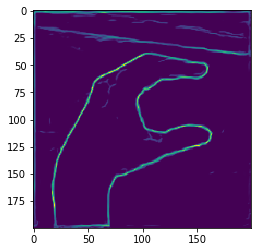

In [79]:
data_path = '../data/asl_alphabet_validation/'
Xi = skimage.io.imread(os.path.join(data_path, 'C/C_test.jpg'))
Xi = detect_edges.predict_custom_image(Xi)
Xi = resize(Xi,(200,200))
# Xi = detect_edges.to_rgb1(Xi)
plt.imshow(Xi)
Xi[0]

In [72]:
print(Xi.shape)
def predict_rgb(image):  
    print(image.shape)
    image = detect_edges.predict_custom_image(image)
    image = detect_edges.to_rgb1(image)
    image = resize(Xi,(1,200,200,3))
    plt.imshow(image)
    return model.predict(image)
def predict_gray(image):  
    
    image = detect_edges.predict_custom_image(image)
    image = detect_edges.to_rgb1(image)
    image = resize(Xi,(1,128,128,1))
    return model.predict(image)
explanation = explainer.explain_instance(Xi, model.predict)

(200, 200)


100%|██████████| 1000/1000 [01:17<00:00, 12.96it/s]


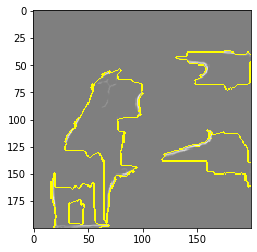

In [74]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))